## Simple Linear Regression for the growth stock Tesla (TSLA)

In [26]:
#Importing the needed modules
import numpy as np
from numpy import array
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#Following ensure that graph is on the same page
%matplotlib inline

In [27]:
#Consider daily High, Low, Volume of the growth stock Tesla (TSLA), from January 2nd 2020 until October 1st

# Download historical data
symbols = 'TSLA'
start_date = '2020-01-02'
end_date = '2020-10-01'
data = yf.download(symbols, start=start_date, end=end_date, group_by='ticker')

# Extract High, Low, Volume
prices=data[['High','Low','Volume']]

#Let Range = High/Low.
prices['Range']=prices['High']/prices['Low']

#Normalize the Volume and the range
prices['Range']=(prices['Range']-prices['Range'].mean())/prices['Range'].std()
prices['Volume']=(prices['Volume']-prices['Volume'].mean())/prices['Volume'].std()
prices

[*********************100%***********************]  1 of 1 completed


C:\Users\loaus\AppData\Local\Temp\ipykernel_14252\1879317785.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['Range']=prices['High']/prices['Low']
C:\Users\loaus\AppData\Local\Temp\ipykernel_14252\1879317785.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['Range']=(prices['Range']-prices['Range'].mean())/prices['Range'].std()
C:\Users\loaus\AppData\Local\Temp\ipykernel_14252\1879317785.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,High,Low,Volume,Range
Date,,,,
2020-01-02,28.713333,28.114000,-0.997389,-1.101223
2020-01-03,30.266666,29.128000,0.077279,-0.686487
2020-01-06,30.104000,29.333332,-0.919080,-0.985607
2020-01-07,31.441999,30.224001,0.090780,-0.658317
2020-01-08,33.232666,31.215334,1.819106,-0.090664
...,...,...,...,...
2020-09-24,133.166672,117.099998,0.277153,1.602882
2020-09-25,136.243332,130.433334,-0.487891,-0.559270
2020-09-28,142.693329,138.516663,-0.943721,-0.895070


Alpha and Beta for Range:
Alpha (α): 2.541103806559933e-15
Beta (β): 0.7108631516696489


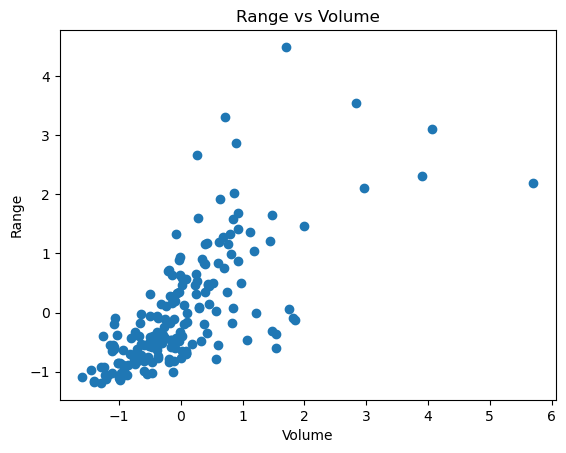

In [28]:
#Regress Range on Volume
x = prices.Volume
y = prices.Range

model1 = np.polyfit(x, y, 1)
alpha=model1[1]
beta=model1[0]

# Print alpha and beta for Range
print("Alpha and Beta for Range:")
print("Alpha (α):", alpha)
print("Beta (β):", beta)
#Scatter plot of data
plt.scatter(prices.Volume,prices.Range)
plt.xlabel("Volume")
plt.ylabel("Range")
plt.title('Range vs Volume')
plt.show()

In [29]:
#Does volume impact range?
import statsmodels.api as sm
import statsmodels.formula.api as smf
#F statistic
model = smf.ols('Range ~ Volume', data=prices).fit()
f_statistic = model.fvalue
p_value = model.f_pvalue

print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Percentage of variability in the range that can be explained by volume
#R-Squared
estimated=alpha+beta*x
residuals=y-estimated
r_squared=1-residuals.var()/y.var()
print("R-squared (Explained Variability):", r_squared)
percentage_variability_explained = (r_squared) * 100
print(f"Percentage of Variability Explained: {percentage_variability_explained:.2f}%")

F-statistic: 191.02706211206163
P-value: 2.1391005351896686e-30
R-squared (Explained Variability): 0.5053264204017064
Percentage of Variability Explained: 50.53%


In [30]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Range   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     191.0
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           2.14e-30
Time:                        02:55:34   Log-Likelihood:                -201.16
No. Observations:                 189   AIC:                             406.3
Df Residuals:                     187   BIC:                             412.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.623e-15      0.051   5.11e-14      1.0

The simple linear regression analysis for Tesla shows that volume has a significant impact on the "Range" (High/Low) prices. The low p-value (2.14e-30) and a substantial F-statistic (191.03) indicate a strong relationship. Approximately 50.53% of the variability in the "Range" can be explained by volume, as represented by the R-squared value. The calculated Alpha (α) and Beta (β) coefficients (2.54e-15 and 0.71, respectively) indicate that for each unit increase in volume, the range tends to increase by 0.71 units. In conclusion, volume significantly impacts the range of Tesla's stock prices, and about half of the variability in range is explained by changes in volume.

## Simple Linear Regression for the defensive stock Pfizer (PFE)

In [31]:
# Define the stock symbols and date range
symbols = 'PFE'
start_date = '2020-01-02'
end_date = '2020-10-01'

# Download historical data
data = yf.download(symbols, start=start_date, end=end_date, group_by='ticker')

# Extract High, Low, Volume
prices=data[['High','Low','Volume']]

#Let Range = High/Low.
prices['Range']=prices['High']/prices['Low']

#Normalize the Volume and the range
prices['Range']=(prices['Range']-prices['Range'].mean())/prices['Range'].std()
prices['Volume']=(prices['Volume']-prices['Volume'].mean())/prices['Volume'].std()
prices

[*********************100%***********************]  1 of 1 completed


C:\Users\loaus\AppData\Local\Temp\ipykernel_14252\1604299999.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['Range']=prices['High']/prices['Low']
C:\Users\loaus\AppData\Local\Temp\ipykernel_14252\1604299999.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['Range']=(prices['Range']-prices['Range'].mean())/prices['Range'].std()
C:\Users\loaus\AppData\Local\Temp\ipykernel_14252\1604299999.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,High,Low,Volume,Range
Date,,,,
2020-01-02,37.333965,36.888046,-1.026104,-0.800423
2020-01-03,37.229603,36.688805,-1.142968,-0.634800
2020-01-06,37.001900,36.717270,-1.080607,-1.071279
2020-01-07,37.125237,36.698292,-0.762146,-0.828813
2020-01-08,37.210625,36.764706,-1.034224,-0.797890
...,...,...,...,...
2020-09-24,34.193546,33.719166,-0.706930,-0.676746
2020-09-25,34.297913,33.700191,-1.183894,-0.447653
2020-09-28,34.705883,34.307400,-1.134051,-0.829989


Alpha and Beta for Range:
Alpha (α): -5.919545234170431e-15
Beta (β): 0.6553421110569803


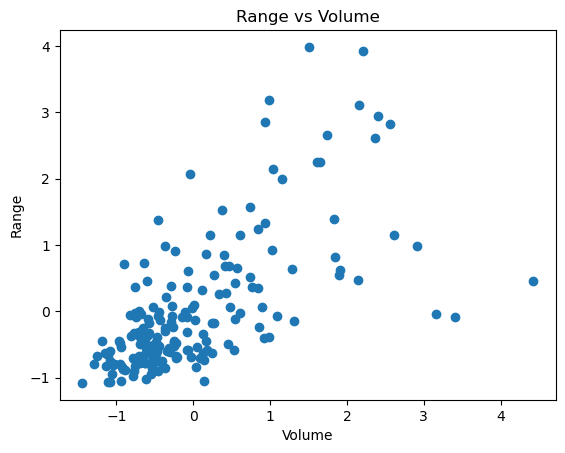

In [32]:
#Regress Range on Volume
x = prices.Volume
y = prices.Range

model1 = np.polyfit(x, y, 1)
alpha=model1[1]
beta=model1[0]

# Print alpha and beta for Range
print("Alpha and Beta for Range:")
print("Alpha (α):", alpha)
print("Beta (β):", beta)
#Scatter plot of data
plt.scatter(prices.Volume,prices.Range)
plt.xlabel("Volume")
plt.ylabel("Range")
plt.title('Range vs Volume')
plt.show()


In [33]:
#Does volume impact range?
import statsmodels.api as sm
import statsmodels.formula.api as smf
#F statistic
model = smf.ols('Range ~ Volume', data=prices).fit()
f_statistic = model.fvalue
p_value = model.f_pvalue

print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Percentage of variability in the range that can be explained by volume
#R-Squared
estimated=alpha+beta*x
residuals=y-estimated
r_squared=1-residuals.var()/y.var()
print("R-squared (Explained Variability):", r_squared)
percentage_variability_explained = (r_squared) * 100
print(f"Percentage of Variability Explained: {percentage_variability_explained:.2f}%")

F-statistic: 140.76729690677394
P-value: 1.4380502756787761e-24
R-squared (Explained Variability): 0.4294732825246199
Percentage of Variability Explained: 42.95%


In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Range   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     140.8
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.44e-24
Time:                        02:55:40   Log-Likelihood:                -214.65
No. Observations:                 189   AIC:                             433.3
Df Residuals:                     187   BIC:                             439.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.933e-15      0.055  -1.08e-13      1.0

The simple linear regression for Pfizer demonstrates a significant relationship between volume and the "Range" (High/Low) prices. The low p-value (1.44e-24) and a substantial F-statistic (140.77) indicate strong statistical significance, suggesting that changes in trading volume impact the range. About 42.95% of the variability in the "Range" can be explained by volume, as indicated by the R-squared value. The Alpha (α) and Beta (β) coefficients (-5.92e-15 and 0.655, respectively) show that, on average, for each unit increase in volume, the range tends to increase by 0.655 units. In summary, volume significantly affects Pfizer's stock price range, explaining nearly 43% of the variability.